# Objective

Our objective  is to find, the accurate ML model which can be a great fit, for the following dataset and will it rain the next day or not?

## Importing the libraries

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

import os
os.getcwd()
# os.chdir("C:\Users\HP")
# os.getcwd()

pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import various functions from scipy
from scipy import stats

# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression, LogisticRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler, RobustScaler 

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score, cohen_kappa_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier


# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

import random

## Importing the dataset 

In [4]:
df = pd.read_csv('rainfall_prediction.csv')
df.head()

,Obs_Id,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
0,1,3.600000,1.000000,3.000000,14.225000,12.333333,82.000000,1028.100000,0
1,2,0.000000,7.200000,4.900000,23.075000,44.333333,69.500000,1015.650000,1
2,3,0.000000,0.600000,1.500000,10.175000,16.666667,87.000000,1026.450000,0
3,4,0.800000,2.400000,0.500000,19.000000,42.666667,89.000000,1010.050000,1
4,5,40.400000,3.000000,3.600000,18.725000,35.333333,81.500000,1005.600000,0


In [5]:
df.RainTomorrow.value_counts()

0    1230
1     290
Name: RainTomorrow, dtype: int64

## Data Preprocessing

In [6]:
#find the dimension odf the datyaset
df.shape

(1520, 9)

There are 1520 rows and 9 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Obs_Id        1520 non-null   int64  
 1   Rainfall      1520 non-null   float64
 2   Evaporation   1520 non-null   float64
 3   Sunshine      1520 non-null   float64
 4   Temp          1520 non-null   float64
 5   Wind_Speed    1520 non-null   float64
 6   Humidity      1520 non-null   float64
 7   Pressure      1520 non-null   float64
 8   RainTomorrow  1520 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 107.0 KB


In [8]:
#check for missing and duplicate values
df.isnull().sum()

Obs_Id          0
Rainfall        0
Evaporation     0
Sunshine        0
Temp            0
Wind_Speed      0
Humidity        0
Pressure        0
RainTomorrow    0
dtype: int64

There are no null values.

In [9]:
df.duplicated().any()

False

In [10]:
df.duplicated().sum()

0

There are no duplicate values as well

# EDA

In [11]:
#replacing 'Obs_Id' with index
df.set_index('Obs_Id',inplace = True)

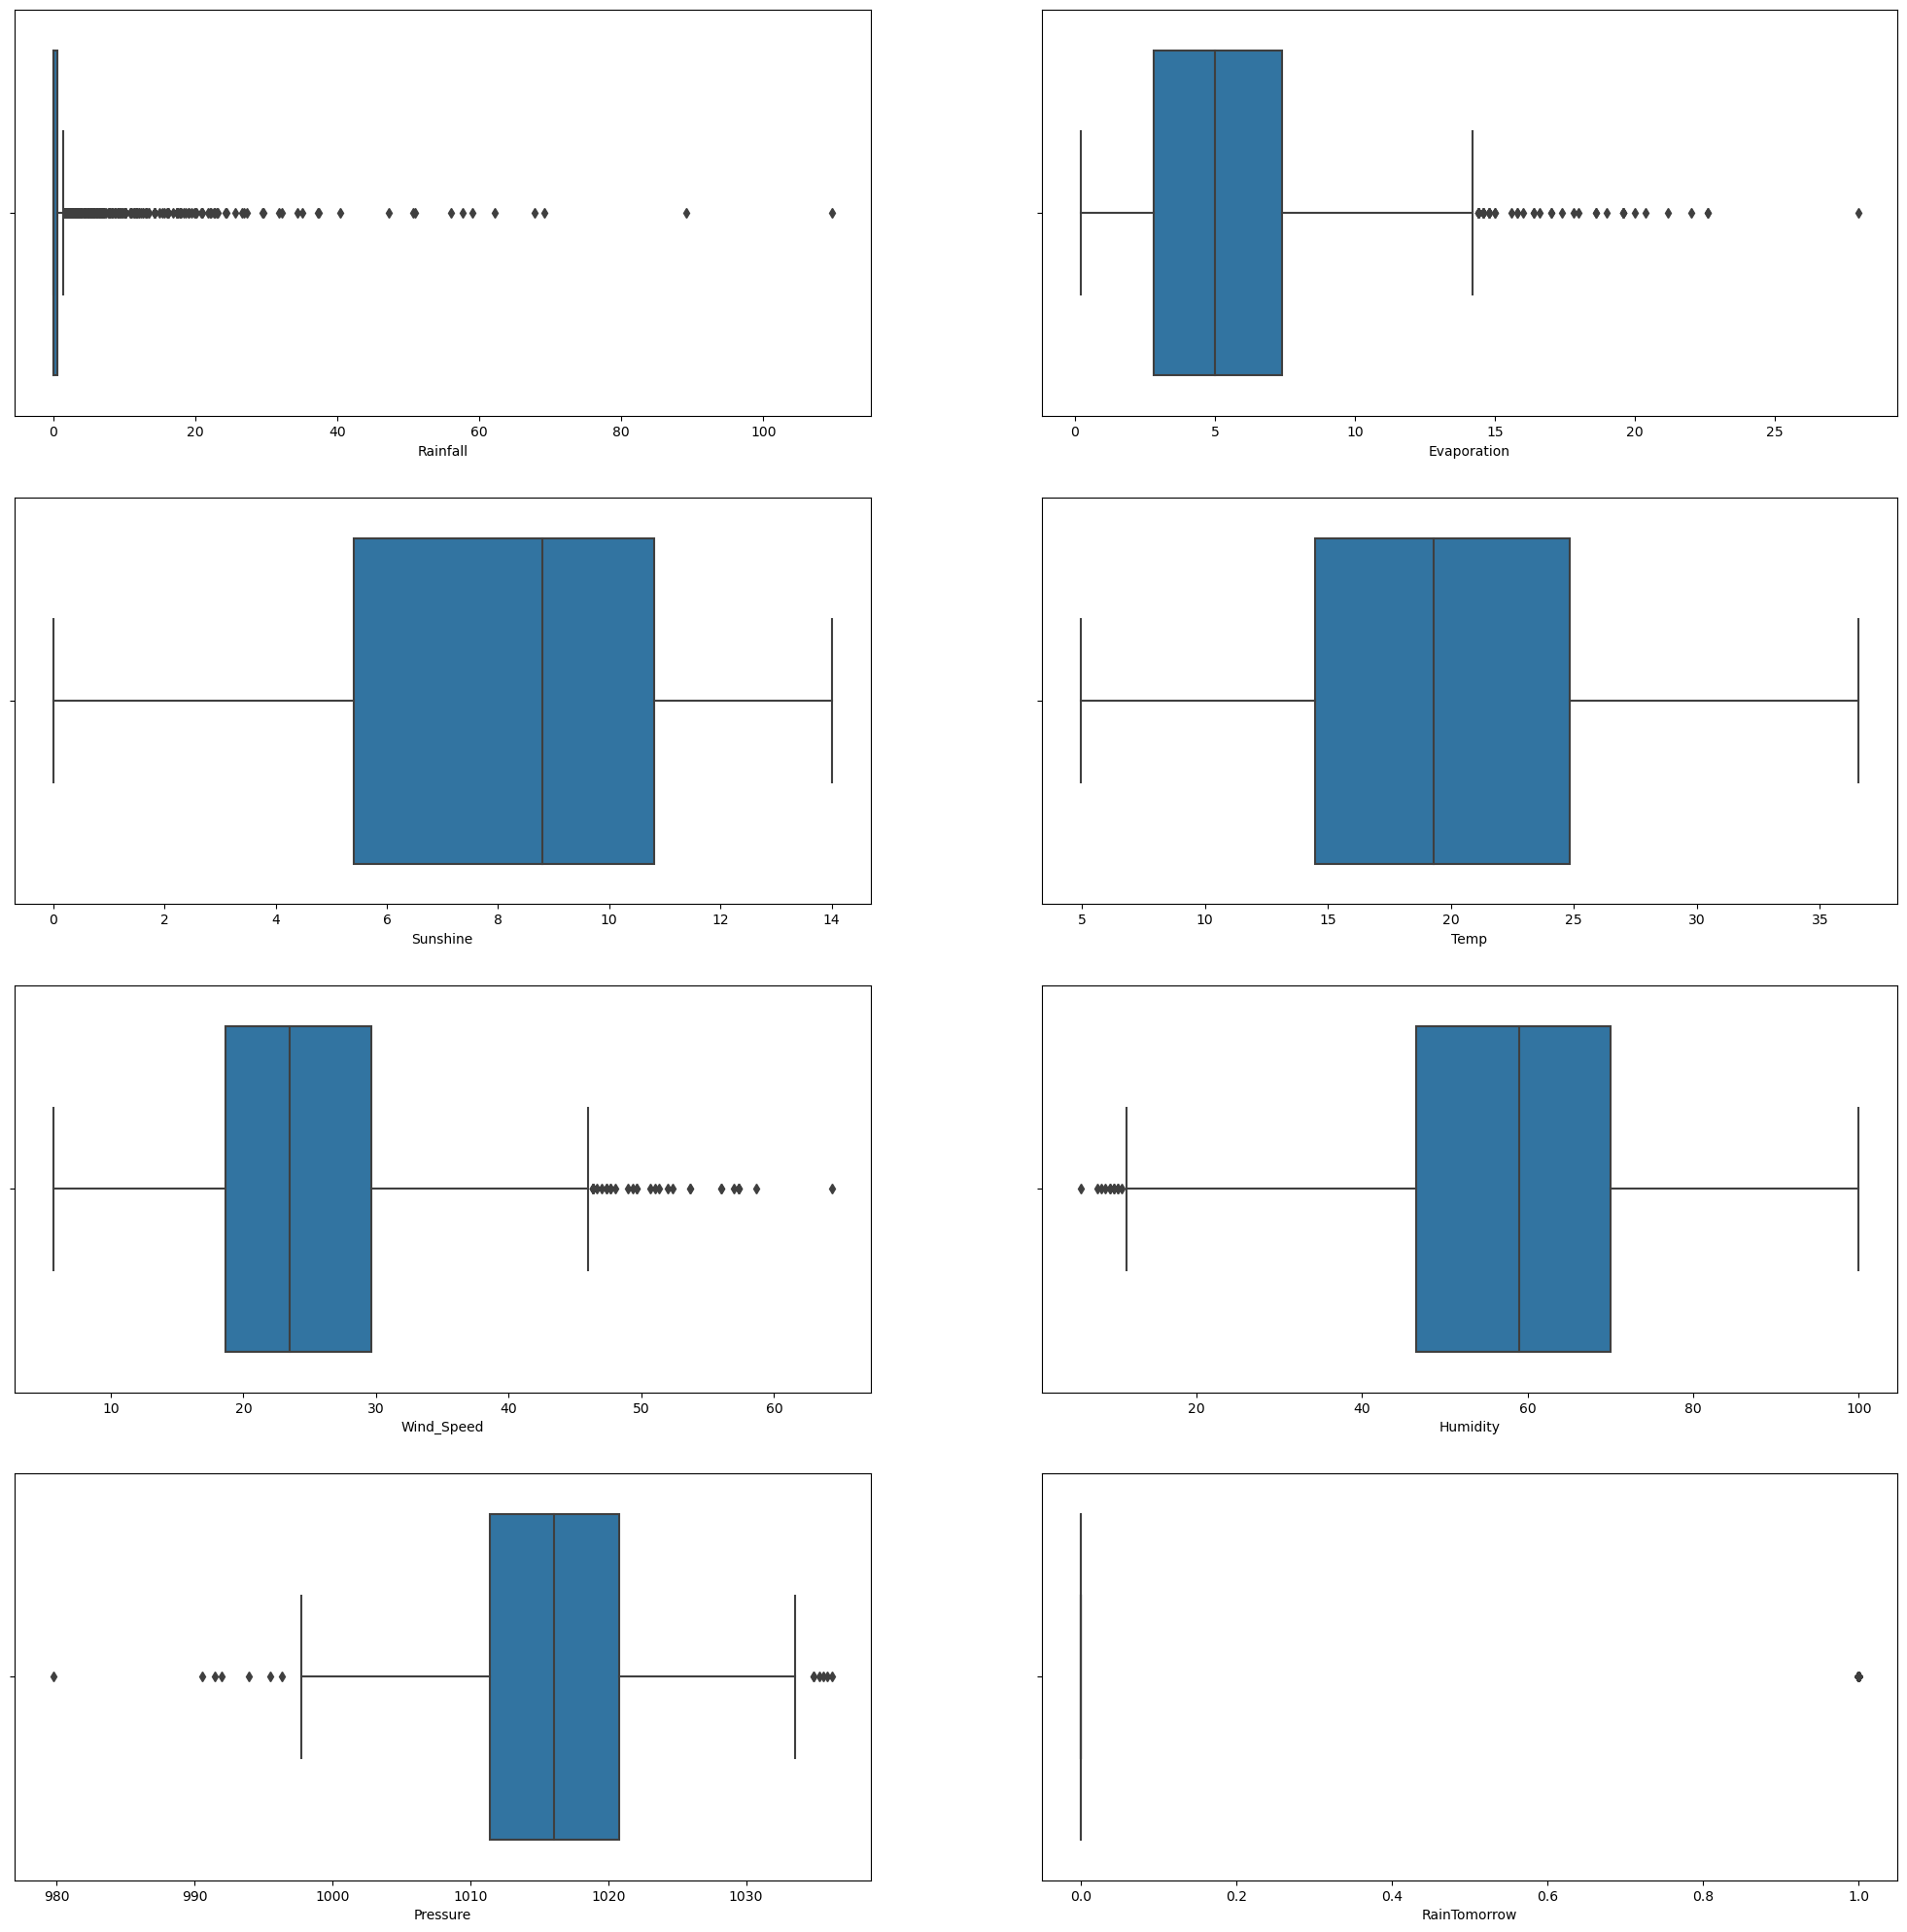

In [12]:
#checking for outliers using boxplots
fig,ax = plt.subplots(4,2,figsize=(25,25))

for var,subplot in zip(df.columns,ax.flatten()):
    sns.boxplot(df[var],ax=subplot)
    
plt.show()

There are outliers present.

In [13]:
#flooring and capping the outliers
for col in df.columns:
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]

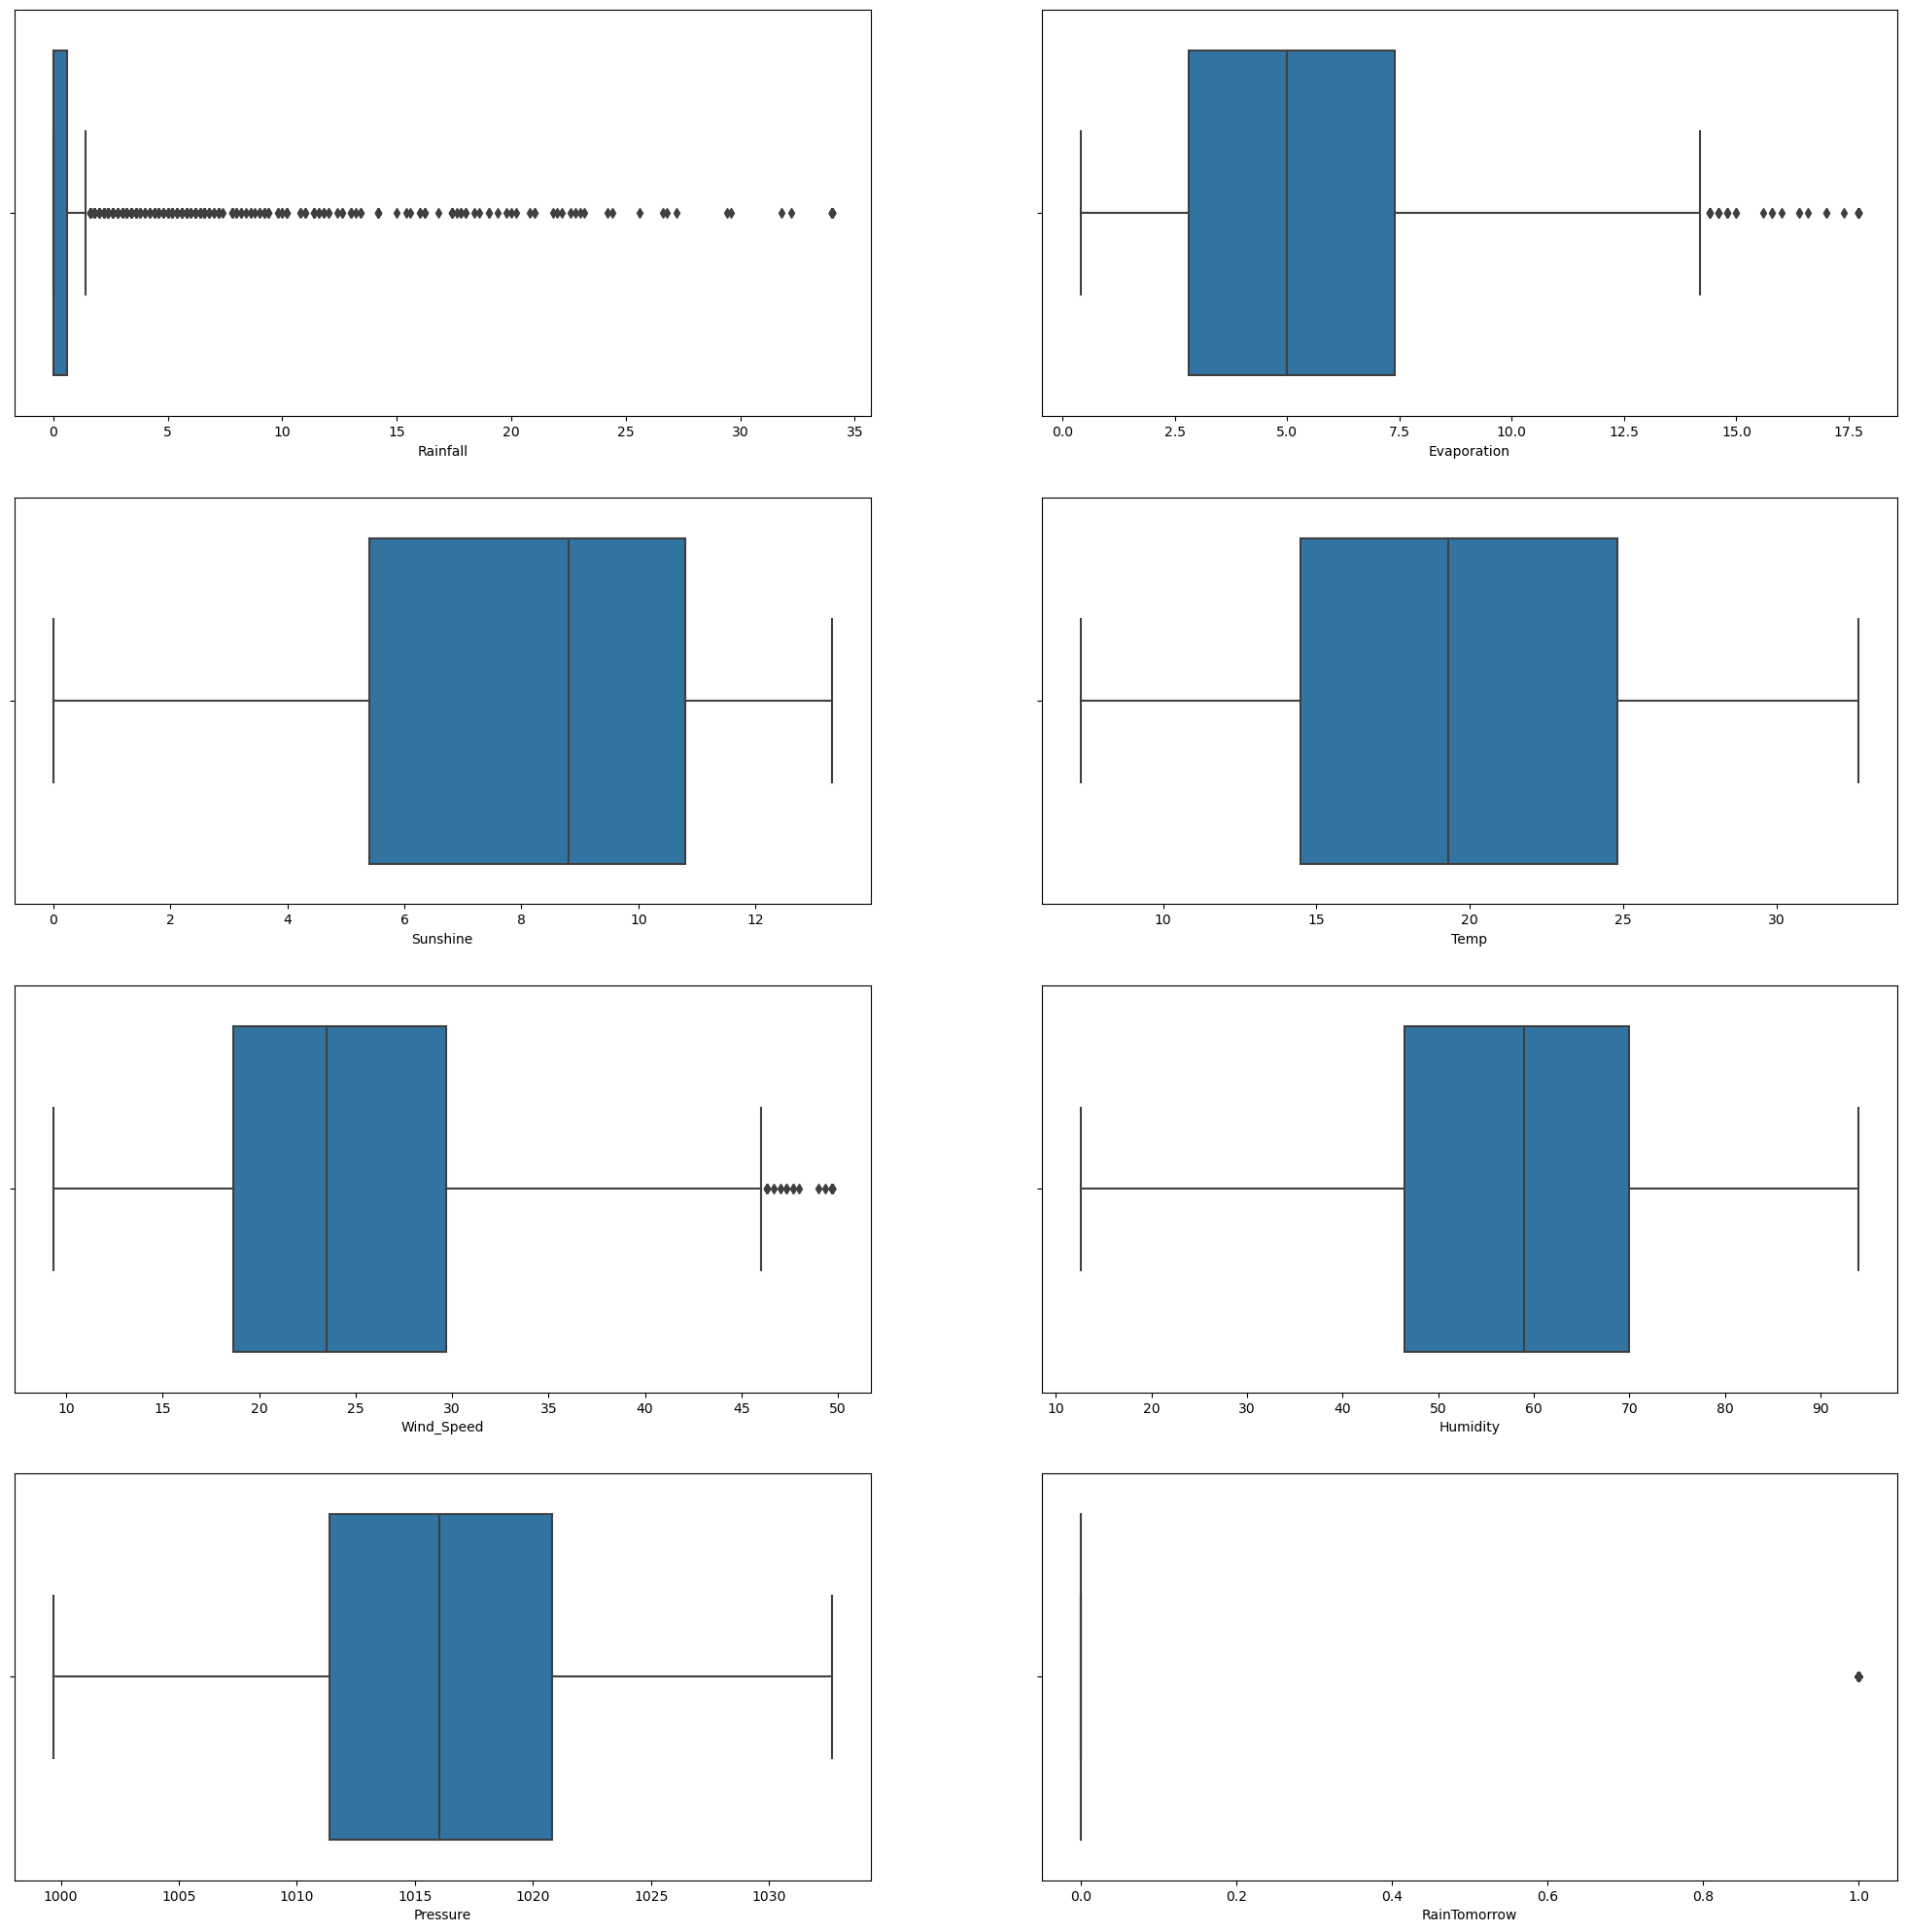

In [14]:
fig,ax = plt.subplots(4,2,figsize=(25,25))

for var,subplot in zip(df.columns,ax.flatten()):
    sns.boxplot(df[var],ax=subplot)
    
plt.show()

<AxesSubplot:xlabel='Pressure', ylabel='count'>

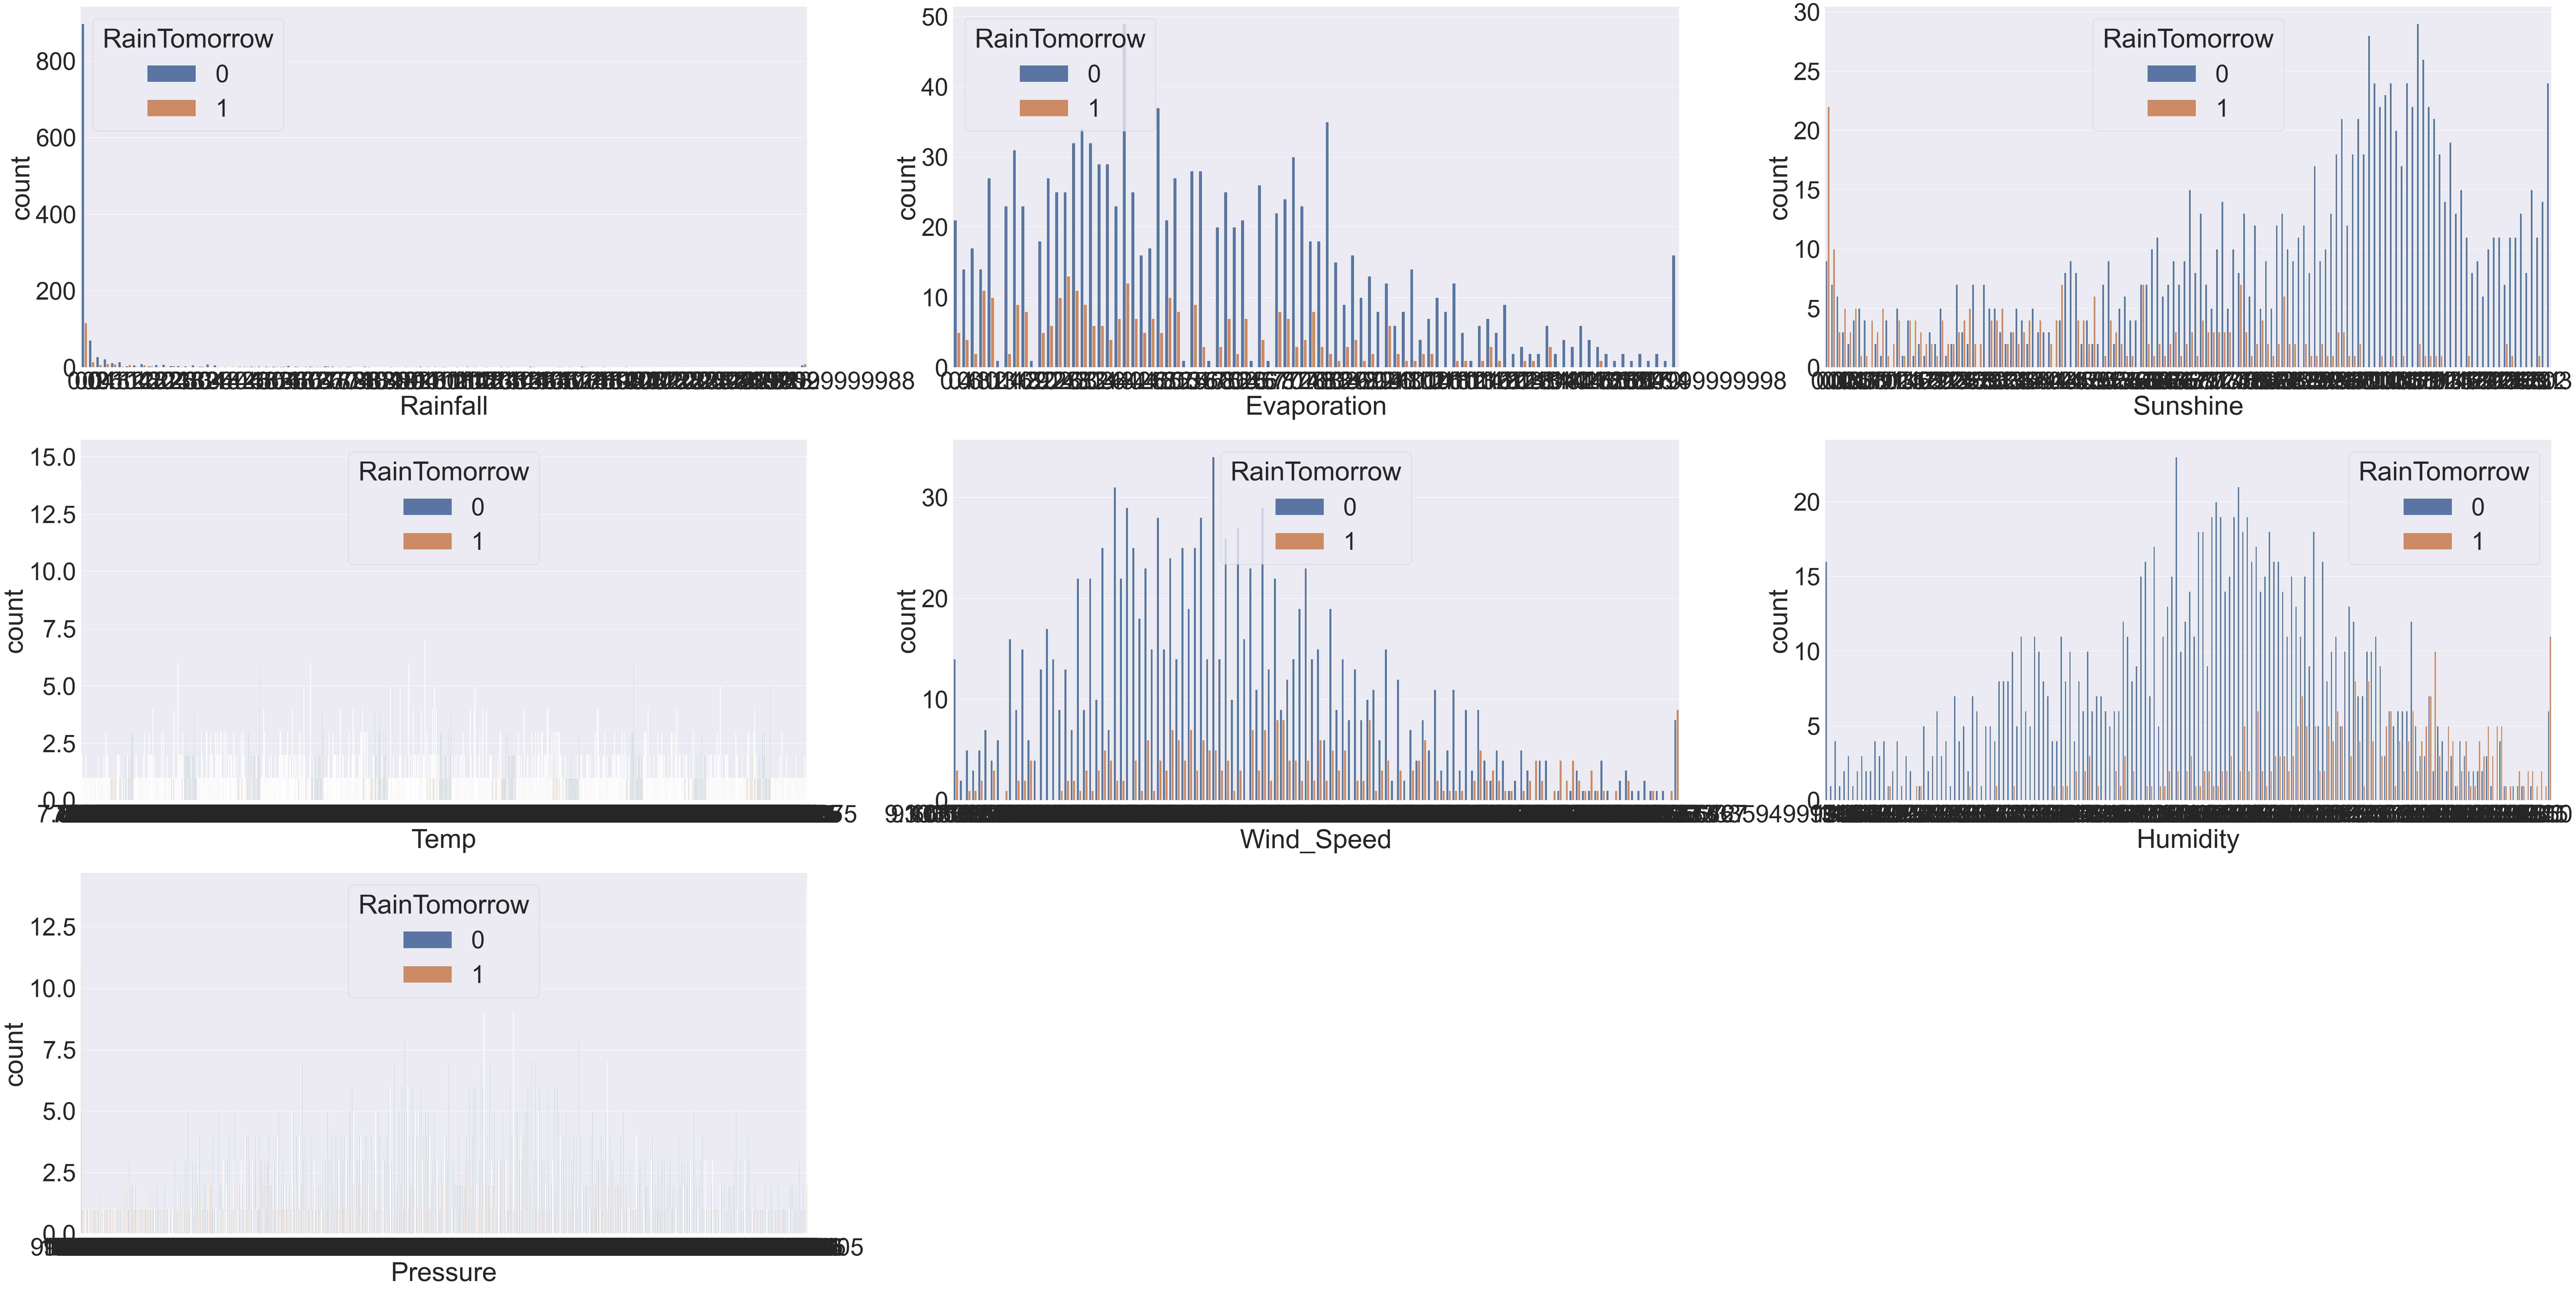

In [15]:
#plotting coumtplots to compare the independent variables with the dependent variable
plt.figure(figsize = (100,50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df['Rainfall'], hue = df['RainTomorrow'])
plt.subplot(332)
sns.countplot(df['Evaporation'], hue = df['RainTomorrow'])
plt.subplot(333)
sns.countplot(df['Sunshine'], hue = df['RainTomorrow'])
plt.subplot(334)
sns.countplot(df['Temp'], hue = df['RainTomorrow'])
plt.subplot(335)
sns.countplot(df['Wind_Speed'], hue = df['RainTomorrow'])
plt.subplot(336)
sns.countplot(df['Humidity'], hue = df['RainTomorrow'])
plt.subplot(337)
sns.countplot(df['Pressure'], hue = df['RainTomorrow'])

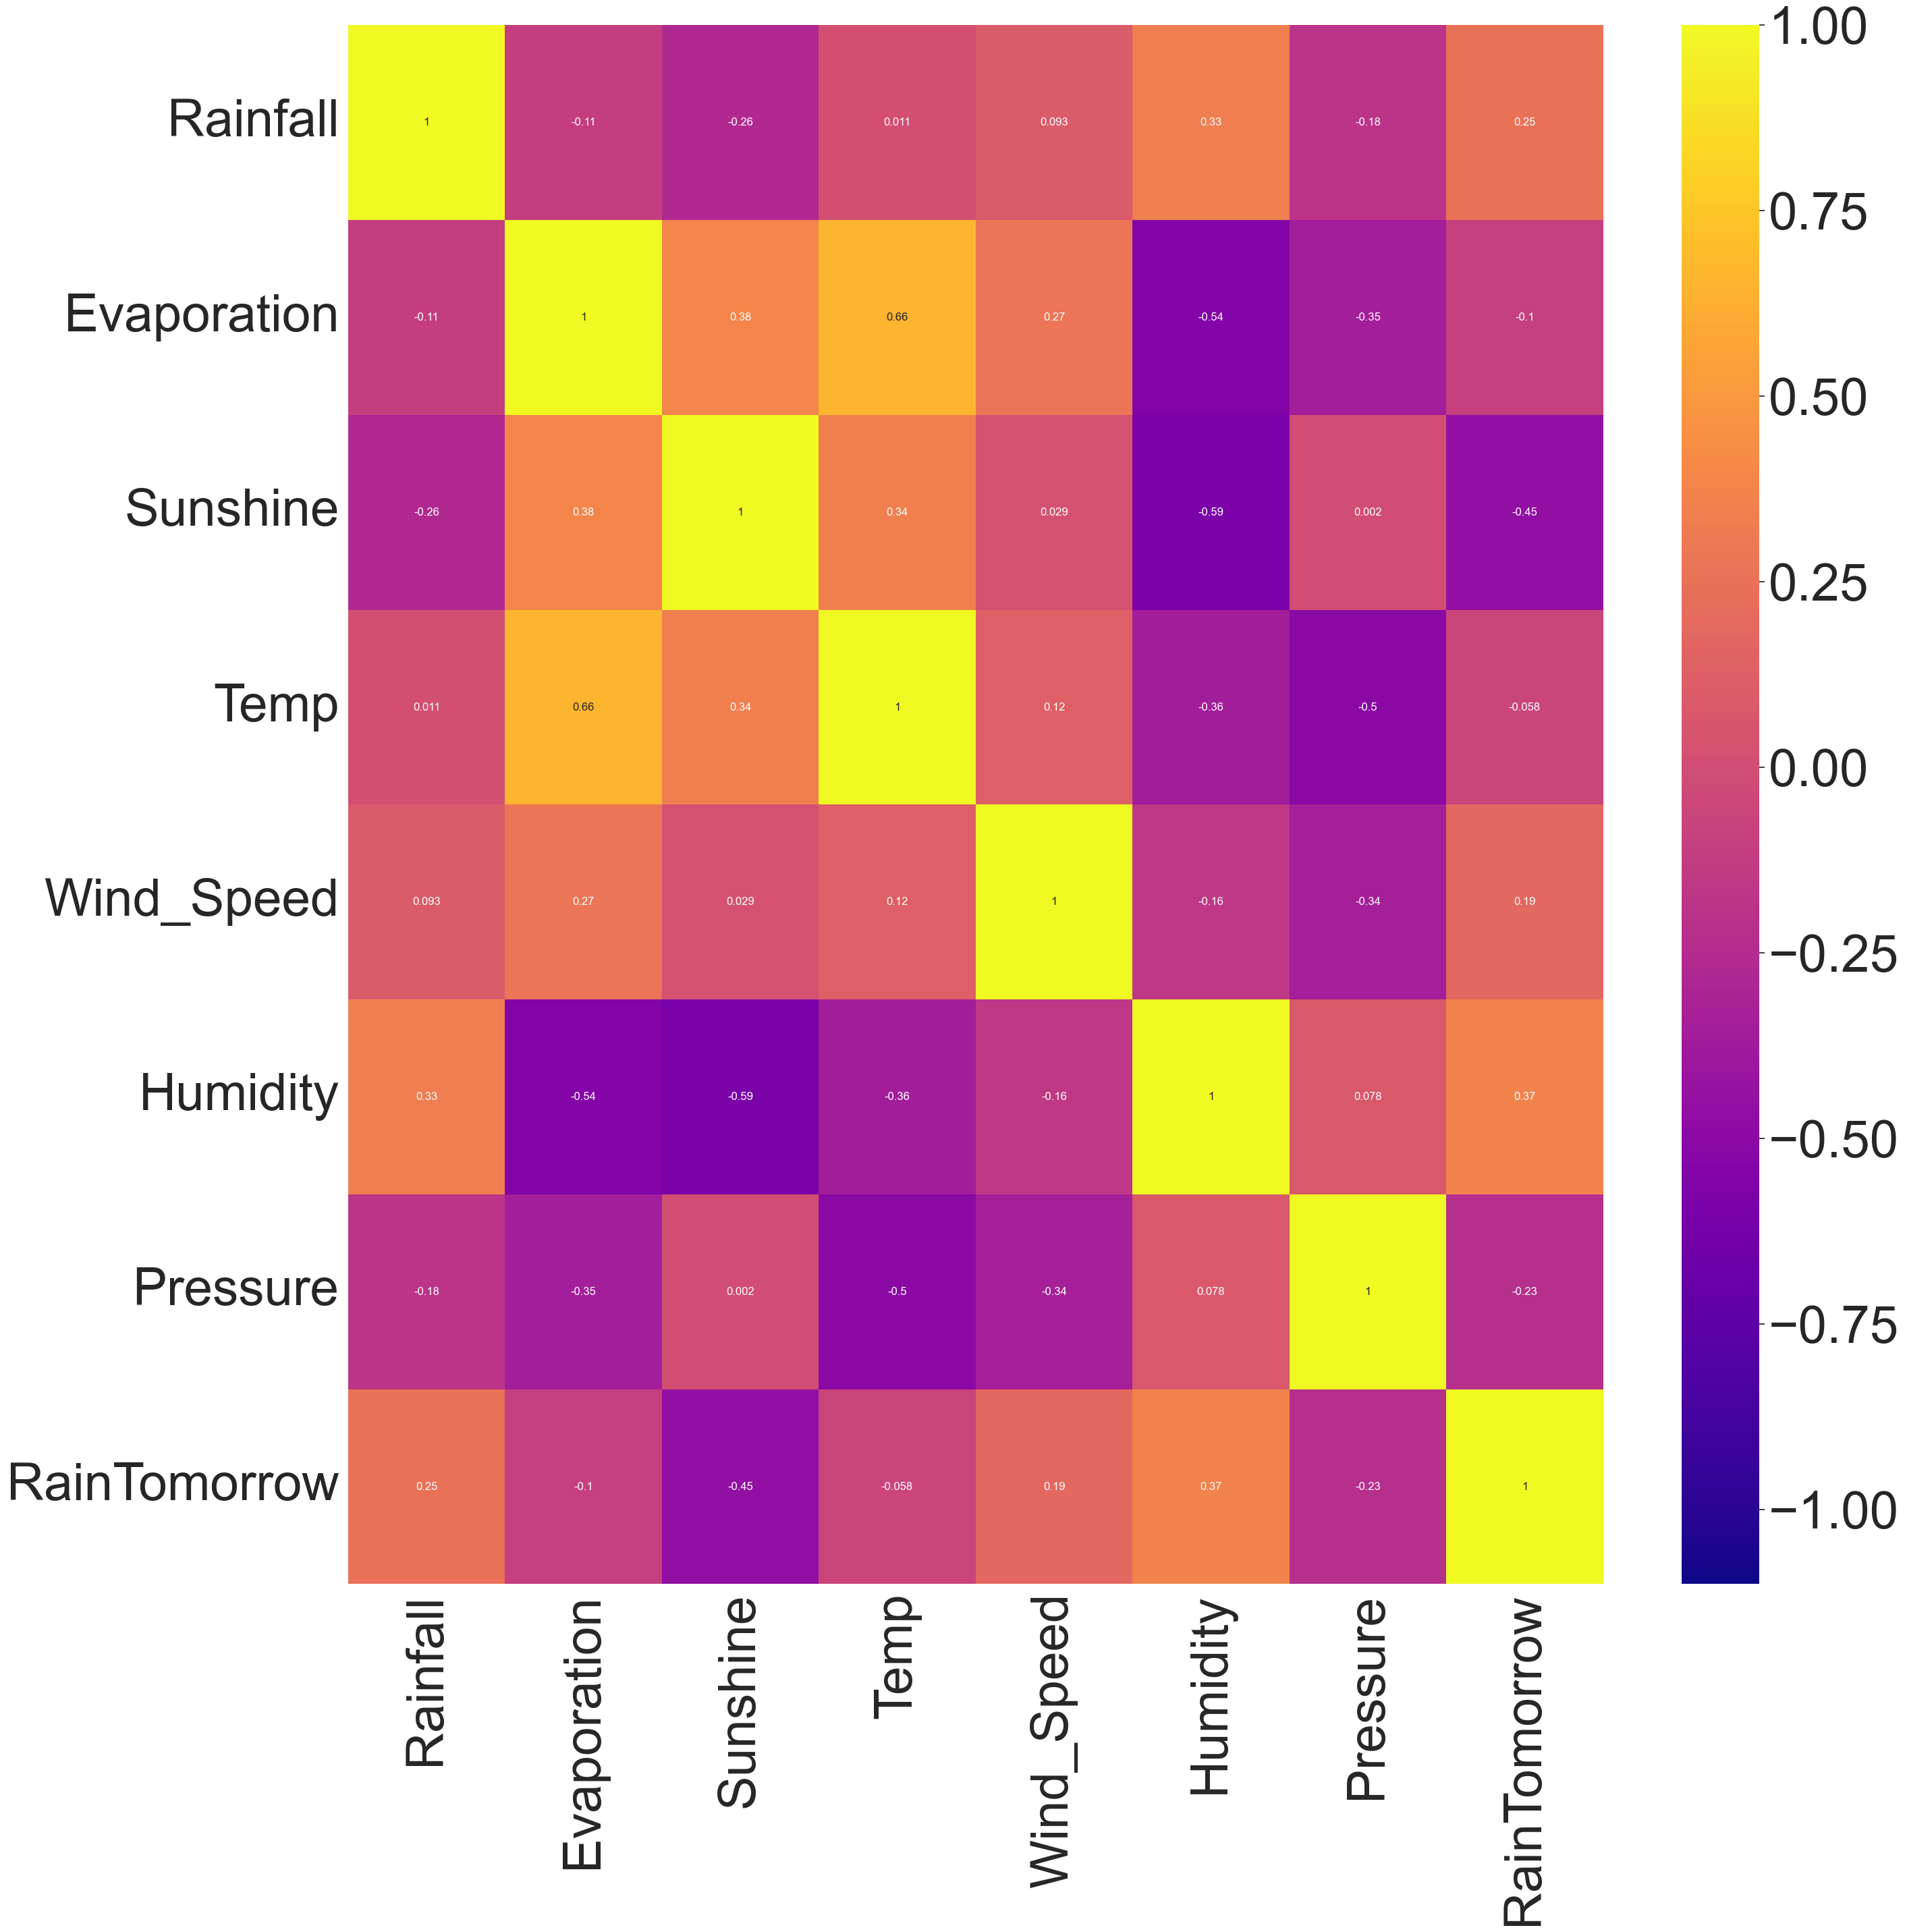

In [16]:
#plotting heatmap to check correlation among variables
plt.figure(figsize=(30,30))

sns.heatmap(df.corr(),cmap='plasma',annot=True,vmin=1.0,vmax=-1.0,annot_kws={"size":12})
plt.show()

The level of correlation increases as the colors become brighter. The humidity, wind speed and evaporation show positive correlation which in turn affects if it will rain the next day or not.

## Model 1 - Base Model

In [17]:
x = df.drop(['RainTomorrow'], axis =1)
y = df['RainTomorrow']

In [18]:
#train test split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 0, stratify =y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1064, 7)
(456, 7)
(1064,)
(456,)


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

In [20]:
Cont = pd.crosstab(y,y_test,margins = True)
Cont

RainTomorrow,0,1,All
RainTomorrow,,,
0,369,0,369
1,0,87,87
All,369,87,456


In [21]:
import scipy.stats
from scipy import stats
scipy.stats.chi2_contingency(Cont)

(456.00000000000006,
 2.1912584729738717e-97,
 4,
 array([[298.59868421,  70.40131579, 369.        ],
        [ 70.40131579,  16.59868421,  87.        ],
        [369.        ,  87.        , 456.        ]]))

In [22]:
cont = pd.crosstab(y,y_train,margins = True)
cont

RainTomorrow,0,1,All
RainTomorrow,,,
0,861,0,861
1,0,203,203
All,861,203,1064


In [23]:
scipy.stats.chi2_contingency(cont)

(1064.0,
 4.809089243878384e-229,
 4,
 array([[ 696.73026316,  164.26973684,  861.        ],
        [ 164.26973684,   38.73026316,  203.        ],
        [ 861.        ,  203.        , 1064.        ]]))

In [24]:
log_reg = LogisticRegression()
# train the model with input and output data - train
log_reg.fit(X_train,y_train)

LogisticRegression()

In [25]:
print('Coefficients:', log_reg.coef_)
print('Intercept::', log_reg.fit_intercept)
print('R^2 score: ', log_reg.score(X_train,y_train))
from sklearn.metrics import cohen_kappa_score
print('Cohen-kappa- score:', cohen_kappa_score(y_test,log_reg.predict(X_test)))
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate the AUC score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,roc_curve, classification_report, confusion_matrix
auc_score = roc_auc_score(y_test, y_pred_proba)
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Coefficients: [[ 0.07248399  0.12033467 -0.88350663  0.06737169  0.50134225  0.8472847
  -0.395761  ]]
Intercept:: True
R^2 score:  0.849624060150376
Cohen-kappa- score: 0.531371700562527
AUC score: 0.9031243185995079
Precision: 0.7679
Recall: 0.4943
F1 Score: 0.6014


In [26]:
print(classification_report(y_test, y_pred))
print('accuracy train :', log_reg.score(X_train, y_train))
print('accuracy test :', log_reg.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       369
           1       0.77      0.49      0.60        87

    accuracy                           0.88       456
   macro avg       0.83      0.73      0.76       456
weighted avg       0.87      0.88      0.86       456

accuracy train : 0.849624060150376
accuracy test : 0.875


In [27]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.15037593984962405
Test MSE: 0.125
The model is potentially overfitting.


In [28]:
#dtree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))
print('accuracy train :', dt_model.score(X_train, y_train))
print('accuracy test :', dt_model.score(X_test, y_test))
print('Cohen kappa score:', cohen_kappa_score(y_test,dt_model.predict(X_test)))
dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
auc_score = roc_auc_score(y_test, dt_pred_proba)
print('AUC score:', auc_score)
precision = precision_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


              precision    recall  f1-score   support

           0       0.89      0.86      0.87       369
           1       0.48      0.54      0.51        87

    accuracy                           0.80       456
   macro avg       0.68      0.70      0.69       456
weighted avg       0.81      0.80      0.80       456

accuracy train : 1.0
accuracy test : 0.8004385964912281
Cohen kappa score: 0.3834908183276876
AUC score: 0.7010092514718251
Precision: 0.4796
Recall: 0.5402
F1 Score: 0.5081


In [29]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.0
Test MSE: 0.19956140350877194
The model is potentially underfitting.


In [30]:
#knn model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)
print(classification_report(y_test, knn_pred))
print('accuracy train :', knn_model.score(X_train, y_train))
print('accuracy test :', knn_model.score(X_test, y_test))
print('Cohen - kappa:', cohen_kappa_score(y_test,knn_model.predict(X_test)))
knn_pred_proba = knn_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
auc_score = roc_auc_score(y_test, knn_pred_proba)
print('AUC score:', auc_score)
precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       369
           1       0.70      0.37      0.48        87

    accuracy                           0.85       456
   macro avg       0.78      0.66      0.70       456
weighted avg       0.83      0.85      0.83       456

accuracy train : 0.8703007518796992
accuracy test : 0.8486842105263158
Cohen - kappa: 0.4023250512878961
AUC score: 0.8387066629286983
Precision: 0.6957
Recall: 0.3678
F1 Score: 0.4812


In [31]:
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.12969924812030076
Test MSE: 0.1513157894736842
The model is potentially underfitting.


In [32]:
#naivebayes model
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
nb_pred = nb_model.predict(X_test)
print(classification_report(y_test, nb_pred))
print('accuracy train :', nb_model.score(X_train, y_train))
print('accuracy test :', nb_model.score(X_test, y_test))
print('Cohen - kappa :', cohen_kappa_score(y_test,nb_model.predict(X_test)))
nb_pred_proba = nb_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
auc_score = roc_auc_score(y_test, nb_pred_proba)
print('AUC score:', auc_score)
precision = precision_score(y_test, nb_pred)
recall = recall_score(y_test, nb_pred)
f1 = f1_score(y_test, nb_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       369
           1       0.60      0.53      0.56        87

    accuracy                           0.84       456
   macro avg       0.74      0.72      0.73       456
weighted avg       0.84      0.84      0.84       456

accuracy train : 0.8308270676691729
accuracy test : 0.8421052631578947
Cohen - kappa : 0.4651549213175643
AUC score: 0.867987415506339
Precision: 0.5974
Recall: 0.5287
F1 Score: 0.5610


In [33]:
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse <  test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.16917293233082706
Test MSE: 0.15789473684210525
The model is potentially overfitting.


In [34]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print('accuracy train :', rf.score(X_train, y_train))
print('accuracy_test:', accuracy_score(y_test, y_pred_rf))
print('Cohen Kappa:', cohen_kappa_score(y_test,rf.predict(X_test)))
rf_pred_proba = rf.predict_proba(X_test)[:, 1]  
auc_score = roc_auc_score(y_test, rf_pred_proba)
print('AUC score:', auc_score)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       369
           1       0.75      0.45      0.56        87

    accuracy                           0.87       456
   macro avg       0.82      0.71      0.74       456
weighted avg       0.86      0.87      0.85       456

accuracy train : 1.0
accuracy_test: 0.8662280701754386
Cohen Kappa: 0.4880742049469965
AUC score: 0.870915490764103
Precision: 0.7500
Recall: 0.4483
F1 Score: 0.5612


In [35]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test:", test_mse)

# Check for overfitting or underfitting
if train_mse <  test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.0
Test: 0.1337719298245614
The model is potentially underfitting.


In [36]:
#classification report scorecard
from sklearn.datasets import make_classification
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'KNearestNeighbour': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()}
for model_name, model in models.items():
    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Generate and print the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print('-' * 50)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       369
           1       0.68      0.46      0.55        87

    accuracy                           0.86       456
   macro avg       0.78      0.70      0.73       456
weighted avg       0.84      0.86      0.84       456

--------------------------------------------------
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       369
           1       0.77      0.49      0.60        87

    accuracy                           0.88       456
   macro avg       0.83      0.73      0.76       456
weighted avg       0.87      0.88      0.86       456

--------------------------------------------------
Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      

Although, the base model with logistic regression alogorithm gives the best case scenario and appears to be a great fit, the random forest alogorithm gives the most accurate model as the precision, f1 score and recall score are relatively higher. However, the naive bayes model is a perfect fit model, since the train and test RMSE are relatively closer.

## Model 2 - applying SMOTE

In [37]:
#oversampling
from imblearn.over_sampling import SMOTE
X, Y = SMOTE().fit_resample(x, y)
from collections import Counter
print(sorted(Counter(Y).items()))

[(0, 1230), (1, 1230)]


In [38]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0, stratify = Y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1722, 7)
(738, 7)
(1722,)
(738,)


In [39]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [40]:
Con = pd.crosstab(Y,Y_test,margins = True)
Con

RainTomorrow,0,1,All
RainTomorrow,,,
0,369,0,369
1,0,369,369
All,369,369,738


In [41]:
scipy.stats.chi2_contingency(Con)

(738.0,
 2.0584385268406705e-158,
 4,
 array([[184.5, 184.5, 369. ],
        [184.5, 184.5, 369. ],
        [369. , 369. , 738. ]]))

The chi square value for test is 738, p value = 2 and dof = 4

In [42]:
con = pd.crosstab(Y,Y_train,margins = True)
con

RainTomorrow,0,1,All
RainTomorrow,,,
0,861,0,861
1,0,861,861
All,861,861,1722


In [43]:
scipy.stats.chi2_contingency(con)

(1722.0,
 0.0,
 4,
 array([[ 430.5,  430.5,  861. ],
        [ 430.5,  430.5,  861. ],
        [ 861. ,  861. , 1722. ]]))

The chi square value for train is 1722, p value = 0 and dof = 4

In [44]:

# train the model with input and output data - train
Log_reg = LogisticRegression()
Log_reg.fit(x_train,Y_train)


LogisticRegression()

In [45]:
print('Coefficients:', Log_reg.coef_)
print('Intercept::', Log_reg.fit_intercept)
print('R^2 score: ', Log_reg.score(x_train,Y_train))
print('Cohen-kappa- score:', cohen_kappa_score(Y_test,Log_reg.predict(x_test)))
Y_pred = Log_reg.predict(x_test)
Y_pred_proba = Log_reg.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Calculate the AUC score
auc_score = roc_auc_score(Y_test, Y_pred_proba)
print('AUC score:', auc_score)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(classification_report(Y_test, Y_pred))
print('accuracy train :', Log_reg.score(x_train, Y_train))
print('accuracy test :', Log_reg.score(x_test, Y_test))

Coefficients: [[ 0.01929081 -0.15901301 -1.12998347  0.20375647  0.64207508  0.71136754
  -0.49069602]]
Intercept:: True
R^2 score:  0.7839721254355401
Cohen-kappa- score: 0.6043360433604337
AUC score: 0.8940886156829048
Precision: 0.7989
Recall: 0.8076
F1 Score: 0.8032
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       369
           1       0.80      0.81      0.80       369

    accuracy                           0.80       738
   macro avg       0.80      0.80      0.80       738
weighted avg       0.80      0.80      0.80       738

accuracy train : 0.7839721254355401
accuracy test : 0.8021680216802168


In [46]:
y_train_pred = Log_reg.predict(x_train)
y_test_pred = Log_reg.predict(x_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse <  test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.21602787456445993
Test MSE: 0.1978319783197832
The model is potentially overfitting.


In [47]:
#dtree model
Dt_model = DecisionTreeClassifier(criterion='entropy')
Dt_model.fit(x_train,Y_train)
Dt_pred = Dt_model.predict(x_test)
print(classification_report(Y_test, Dt_pred))
print('accuracy train :', Dt_model.score(x_train, Y_train))
print('accuracy test :', Dt_model.score(x_test, Y_test))
print('Cohen kappa score:', cohen_kappa_score(Y_test,Dt_model.predict(x_test)))
Dt_pred_proba = Dt_model.predict_proba(x_test)[:, 1]  # Probability of the positive class
auc_score = roc_auc_score(Y_test, Dt_pred_proba)
print('AUC score:', auc_score)
precision = precision_score(Y_test, Dt_pred)
recall = recall_score(Y_test, Dt_pred)
f1 = f1_score(Y_test, Dt_pred)

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       369
           1       0.77      0.85      0.81       369

    accuracy                           0.80       738
   macro avg       0.80      0.80      0.80       738
weighted avg       0.80      0.80      0.80       738

accuracy train : 1.0
accuracy test : 0.7994579945799458
Cohen kappa score: 0.5989159891598916
AUC score: 0.7994579945799457
Precision: 0.7702
Recall: 0.8537
F1 Score: 0.8098


In [48]:
y_train_pred = Dt_model.predict(x_train)
y_test_pred = Dt_model.predict(x_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse <  test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.0
Test MSE: 0.2005420054200542
The model is potentially underfitting.


In [49]:
#knn model
Knn_model = KNeighborsClassifier(n_neighbors=5)
Knn_model.fit(x_train,Y_train)
Knn_pred = Knn_model.predict(x_test)
print(classification_report(Y_test, Knn_pred))
print('accuracy train :', Knn_model.score(x_train, Y_train))
print('accuracy test :', Knn_model.score(x_test, Y_test))
print('Cohen - kappa:', cohen_kappa_score(Y_test,Knn_model.predict(x_test)))
Knn_pred_proba = Knn_model.predict_proba(x_test)[:, 1]  # Probability of the positive class
auc_score = roc_auc_score(Y_test, Knn_pred_proba)
print('AUC score:', auc_score)
precision = precision_score(Y_test, Knn_pred)
recall = recall_score(Y_test, Knn_pred)
f1 = f1_score(Y_test, Knn_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       369
           1       0.81      0.93      0.87       369

    accuracy                           0.86       738
   macro avg       0.87      0.86      0.86       738
weighted avg       0.87      0.86      0.86       738

accuracy train : 0.8850174216027874
accuracy test : 0.8577235772357723
Cohen - kappa: 0.7154471544715447
AUC score: 0.9218058034238878
Precision: 0.8113
Recall: 0.9322
F1 Score: 0.8676


In [50]:
y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse <  test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.343205574912892
Test MSE: 0.33739837398373984
The model is potentially overfitting.


In [51]:
#naive-bayes
Nb_model = GaussianNB()
Nb_model.fit(x_train,Y_train)
Nb_pred = Nb_model.predict(x_test)
print(classification_report(Y_test, Nb_pred))
print('accuracy train :', Nb_model.score(x_train, Y_train))
print('accuracy test :', Nb_model.score(x_test, Y_test))
print('Cohen - kappa :', cohen_kappa_score(Y_test,Nb_model.predict(x_test)))
Nb_pred_proba = Nb_model.predict_proba(x_test)[:, 1]  # Probability of the positive class
auc_score = roc_auc_score(Y_test, Nb_pred_proba)
print('AUC score:', auc_score)
precision = precision_score(Y_test, Nb_pred)
recall = recall_score(Y_test, Nb_pred)
f1 = f1_score(Y_test, Nb_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       369
           1       0.81      0.75      0.78       369

    accuracy                           0.79       738
   macro avg       0.79      0.79      0.79       738
weighted avg       0.79      0.79      0.79       738

accuracy train : 0.7717770034843205
accuracy test : 0.7872628726287263
Cohen - kappa : 0.5745257452574526
AUC score: 0.8632280902754829
Precision: 0.8118
Recall: 0.7480
F1 Score: 0.7786


In [52]:
y_train_pred = Nb_model.predict(x_train)
y_test_pred = Nb_model.predict(x_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse <  test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.22822299651567945
Test MSE: 0.2127371273712737
The model is potentially overfitting.


In [53]:
#random forest
Rf=RandomForestClassifier(n_jobs=-1)
Rf.fit(x_train, Y_train)
Y_pred_Rf = Rf.predict(x_test)
print(classification_report(Y_test, Y_pred_Rf))
print('accuracy train :', Rf.score(x_train, Y_train))
print('accuracy_test:', accuracy_score(Y_test, Y_pred_Rf))
print('Cohen Kappa:', cohen_kappa_score(Y_test,Rf.predict(x_test)))
Rf_pred_proba = Rf.predict_proba(x_test)[:, 1]  
auc_score = roc_auc_score(Y_test, Rf_pred_proba)
print('AUC score:', auc_score)
precision = precision_score(Y_test, Y_pred_Rf)
recall = recall_score(Y_test, Y_pred_Rf)
f1 = f1_score(Y_test, Y_pred_Rf)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       369
           1       0.79      0.92      0.85       369

    accuracy                           0.83       738
   macro avg       0.85      0.83      0.83       738
weighted avg       0.85      0.83      0.83       738

accuracy train : 1.0
accuracy_test: 0.8346883468834688
Cohen Kappa: 0.6693766937669376
AUC score: 0.9265832360220622
Precision: 0.7852
Recall: 0.9214
F1 Score: 0.8479


In [54]:
y_train_pred = Rf.predict(x_train)
y_test_pred = Rf.predict(x_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse <  test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.0
Test MSE: 0.16531165311653118
The model is potentially underfitting.


In [55]:
#classification report SMOTE
from sklearn.datasets import make_classification
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'KNearestNeighbour': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()}
for model_name, model in models.items():
    # Fit the model on the training set
    model.fit(x_train, Y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Generate and print the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(Y_test, y_pred))
    print('-' * 50)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       369
           1       0.80      0.92      0.85       369

    accuracy                           0.84       738
   macro avg       0.85      0.84      0.84       738
weighted avg       0.85      0.84      0.84       738

--------------------------------------------------
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       369
           1       0.80      0.81      0.80       369

    accuracy                           0.80       738
   macro avg       0.80      0.80      0.80       738
weighted avg       0.80      0.80      0.80       738

--------------------------------------------------
Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      

In model 2, the KNN algorithm and Naive bayes alogorithm gives a perfect fir model since the train and test RMSE is close to 0 and approximately same.

## Model 3 - Feature Selection

In [56]:
#selecting features with correlation above 0.5
def correlation(dataset, threshold):
    col_corr = set()
    corr_mat = df.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return(col_corr)
corr_features = correlation(X_train, 0.5)
len(set(corr_features))

3

In [57]:
corr_features

{'Humidity', 'Pressure', 'Temp'}

In [58]:
#logistic regression
xprime = df[['Humidity','Pressure','Temp']]
yprime = df['RainTomorrow']
Xp_train, Xp_test, yp_train, yp_test = train_test_split(xprime, yprime, test_size=0.30, random_state=42,stratify = yprime)
xp_train = scaler.fit_transform(Xp_train)
xp_test = scaler.fit_transform(Xp_test)
model = LogisticRegression()
model.fit(xp_train,yp_train)
pred = model.predict(xp_test)
RMSE = (np.sqrt(mean_squared_error(yp_test, pred)))
print("RMSE:",RMSE)
print('accuracy train :', model.score(xp_train, yp_train))
print('accuracy test :', model.score(xp_test, yp_test))
print('Cohen Kappa:', cohen_kappa_score(yp_test,model.predict(xp_test)))
pred_proba = model.predict_proba(xp_test)[:, 1]  
auc_score = roc_auc_score(yp_test, pred_proba)
print('AUC score:', auc_score)
precision = precision_score(yp_test, pred)
recall = recall_score(yp_test, pred)
f1 = f1_score(yp_test, pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

RMSE: 0.40284078958614156
accuracy train : 0.8430451127819549
accuracy test : 0.8377192982456141
Cohen Kappa: 0.3413748682515517
AUC score: 0.7945051864311747
Precision: 0.6585
Recall: 0.3103
F1 Score: 0.4219


In [59]:
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(yp_train, y_train_pred)
test_mse = mean_squared_error(yp_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse <  test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.15695488721804512
Test MSE: 0.16228070175438597
The model is potentially underfitting.


In [60]:
#dtree
model = DecisionTreeClassifier(criterion='gini')
model.fit(xp_train,yp_train)
pred = model.predict(xp_test)
RMSE = (np.sqrt(mean_squared_error(yp_test, pred)))
print("RMSE:",RMSE)
print('accuracy train :', model.score(xp_train, yp_train))
print('accuracy test :', model.score(xp_test, yp_test))
print('Cohen Kappa:', cohen_kappa_score(yp_test,model.predict(xp_test)))
pred_proba = model.predict_proba(xp_test)[:, 1]  
auc_score = roc_auc_score(yp_test, pred_proba)
print('AUC score:', auc_score)
precision = precision_score(yp_test, pred)
recall = recall_score(yp_test, pred)
f1 = f1_score(yp_test, pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

RMSE: 0.5
accuracy train : 1.0
accuracy test : 0.75
Cohen Kappa: 0.19740620657711905
AUC score: 0.5995701336323708
Precision: 0.3483
Recall: 0.3563
F1 Score: 0.3523


In [61]:
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(yp_train, y_train_pred)
test_mse = mean_squared_error(yp_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse <  test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.0
Test MSE: 0.25
The model is potentially underfitting.


In [62]:
#knn
model = KNeighborsClassifier(n_neighbors=5)
model.fit(xp_train,yp_train)
pred = model.predict(xp_test)
RMSE = (np.sqrt(mean_squared_error(yp_test, pred)))
print("RMSE:",RMSE)
print('accuracy train :', model.score(xp_train, yp_train))
print('accuracy test :', model.score(xp_test, yp_test))
print('Cohen Kappa:', cohen_kappa_score(yp_test,model.predict(xp_test)))
pred_proba = model.predict_proba(xp_test)[:, 1]  
auc_score = roc_auc_score(yp_test, pred_proba)
print('AUC score:', auc_score)
precision = precision_score(yp_test, pred)
recall = recall_score(yp_test, pred)
f1 = f1_score(yp_test, pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

RMSE: 0.4417866437506811
accuracy train : 0.8712406015037594
accuracy test : 0.8048245614035088
Cohen Kappa: 0.24525775496540958
AUC score: 0.7102139986917111
Precision: 0.4800
Recall: 0.2759
F1 Score: 0.3504


In [63]:
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(yp_train, y_train_pred)
test_mse = mean_squared_error(yp_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse <  test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.1287593984962406
Testing MSE: 0.19517543859649122
The model is potentially underfitting.


In [64]:
#rf
model = RandomForestClassifier()
model.fit(xp_train,yp_train)
pred = model.predict(xp_test)
RMSE = (np.sqrt(mean_squared_error(yp_test, pred)))
print("RMSE:",RMSE)
print('accuracy train :', model.score(xp_train, yp_train))
print('accuracy test :', model.score(xp_test, yp_test))
print('Cohen Kappa:', cohen_kappa_score(yp_test,model.predict(xp_test)))
pred_proba = model.predict_proba(xp_test)[:, 1]  
auc_score = roc_auc_score(yp_test, pred_proba)
print('AUC score:', auc_score)
precision = precision_score(yp_test, pred)
recall = recall_score(yp_test, pred)
f1 = f1_score(yp_test, pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

RMSE: 0.4214636152117623
accuracy train : 1.0
accuracy test : 0.8223684210526315
Cohen Kappa: 0.3130997545190807
AUC score: 0.739806248637199
Precision: 0.5600
Recall: 0.3218
F1 Score: 0.4088


In [65]:
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(yp_train, y_train_pred)
test_mse = mean_squared_error(yp_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse <  test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.0
Test MSE: 0.17763157894736842
The model is potentially underfitting.


In [66]:
model = GaussianNB()
model.fit(xp_train,yp_train)
pred = model.predict(xp_test)
RMSE = (np.sqrt(mean_squared_error(yp_test, pred)))
print("RMSE:",RMSE)
print('accuracy train :', model.score(xp_train, yp_train))
print('accuracy test :', model.score(xp_test, yp_test))
print('Cohen Kappa:', cohen_kappa_score(yp_test,model.predict(xp_test)))
pred_proba = model.predict_proba(xp_test)[:, 1]  
auc_score = roc_auc_score(yp_test, pred_proba)
print('AUC score:', auc_score)
precision = precision_score(yp_test, pred)
recall = recall_score(yp_test, pred)
f1 = f1_score(yp_test, pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

RMSE: 0.4001096340982626
accuracy train : 0.8430451127819549
accuracy test : 0.8399122807017544
Cohen Kappa: 0.3164120256283883
AUC score: 0.7893031803881256
Precision: 0.7188
Recall: 0.2644
F1 Score: 0.3866


In [67]:
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)

# Calculate mean squared error (MSE) on training and validation sets
train_mse = mean_squared_error(yp_train, y_train_pred)
test_mse = mean_squared_error(yp_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Check for overfitting or underfitting
if train_mse <  test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.15695488721804512
Test MSE: 0.1600877192982456
The model is potentially underfitting.


In [68]:
#bagging and boosting 
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

clf1 = DecisionTreeClassifier(criterion='entropy')
clf2 = KNeighborsClassifier(n_neighbors=5)    
clf3 = DecisionTreeClassifier(criterion='gini')
clf4 = LogisticRegression()
clf5 = GaussianNB()

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging3 = BaggingClassifier(base_estimator=clf3, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging4 = BaggingClassifier(base_estimator=clf4, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging5 = BaggingClassifier(base_estimator=clf5, n_estimators=10, max_samples=0.8, max_features=0.8)

In [69]:
label = ['Dt_entorpy', 'K-NN', 'Dt_gini', 'LogisticRegression','GaussianNB', 'Bagging Tree entopy', 'Bagging K-NN',
        'Bagging Tree gini', 'Bagging LR' , 'Bagging GaussianNB']
clf_list = [clf1, clf2,clf3 , clf4, clf5, bagging1, bagging2 , bagging3 , bagging4 , bagging5]

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, xprime, yprime, cv=3, scoring='accuracy')
    print( "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(xprime, yprime)
    

Accuracy: 0.77 (+/- 0.01) [Dt_entorpy]
Accuracy: 0.83 (+/- 0.00) [K-NN]
Accuracy: 0.77 (+/- 0.00) [Dt_gini]
Accuracy: 0.83 (+/- 0.01) [LogisticRegression]


In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split

clf1 = DecisionTreeClassifier(criterion='entropy')
clf2 = KNeighborsClassifier(n_neighbors=3)    
clf3 = DecisionTreeClassifier(criterion='gini')
clf4 = LogisticRegression()
clf5 = GaussianNB()
clf6 = RandomForestClassifier()

boosting1 = AdaBoostClassifier(base_estimator=clf1, n_estimators=10)
boosting2 = AdaBoostClassifier(base_estimator=clf2, n_estimators=10, random_state=1)
boosting3 = AdaBoostClassifier(base_estimator=clf3, n_estimators=10)
boosting4 = AdaBoostClassifier(base_estimator=clf4, n_estimators=10)
boosting5 = AdaBoostClassifier(base_estimator=clf5, n_estimators=10)
boosting6 = AdaBoostClassifier(base_estimator=clf6, n_estimators=10)

In [71]:
label = ['Dt_entorpy', 'K-NN', 'Dt_gini', 'LogisticRegression','GaussianNB','RF']
clf_list = [clf1, clf2,clf3 , clf4, clf5,clf6]
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

grid = itertools.product([0,5],repeat=3)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, xprime, yprime, cv=3, scoring='accuracy')
    print( "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(xprime, yprime)

Accuracy: 0.76 (+/- 0.01) [Dt_entorpy]
Accuracy: 0.80 (+/- 0.00) [K-NN]
Accuracy: 0.77 (+/- 0.01) [Dt_gini]
Accuracy: 0.83 (+/- 0.01) [LogisticRegression]
Accuracy: 0.84 (+/- 0.00) [GaussianNB]
Accuracy: 0.83 (+/- 0.00) [RF]


In [72]:
label = ['boosting Tree entopy','boosting Tree gini', 'boosting LR' , 'boosting GaussianNB' , 'boosting RF']
clf_list = [boosting1 ,boosting3 , boosting4 , boosting5 , boosting6]
grid = itertools.product([0,5],repeat=3)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, xprime, yprime, cv=3, scoring='accuracy')
    print( "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(xprime, yprime)

Accuracy: 0.77 (+/- 0.01) [boosting Tree entopy]
Accuracy: 0.77 (+/- 0.00) [boosting Tree gini]
Accuracy: 0.83 (+/- 0.01) [boosting LR]
Accuracy: 0.84 (+/- 0.00) [boosting GaussianNB]
Accuracy: 0.83 (+/- 0.00) [boosting RF]


In [73]:
from sklearn.datasets import make_classification
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'KNearestNeighbour': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()}
for model_name, model in models.items():
    # Fit the model on the training set
    model.fit(xp_train, yp_train)

    # Make predictions on the test set
    y_pred = model.predict(xp_test)

    # Generate and print the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(yp_test, y_pred))
    print('-' * 50)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       369
           1       0.55      0.32      0.41        87

    accuracy                           0.82       456
   macro avg       0.70      0.63      0.65       456
weighted avg       0.80      0.82      0.80       456

--------------------------------------------------
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       369
           1       0.66      0.31      0.42        87

    accuracy                           0.84       456
   macro avg       0.76      0.64      0.66       456
weighted avg       0.82      0.84      0.81       456

--------------------------------------------------
Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      

Although, bagging and boosting after feature selection gives great models, it deems the model underfit as the recall, precision and f1 score are extemely low. The Naive Bayes model is only accurate.

# Summary

The 2nd Model with SMOTE algorithm is the best model as there are two algorithms which can make the model a perfect fit.

In [74]:
#checking features with high variency
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold =0)
var_thr.fit(df)

VarianceThreshold(threshold=0)

In [75]:
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

<AxesSubplot:xlabel='Humidity', ylabel='Temp'>

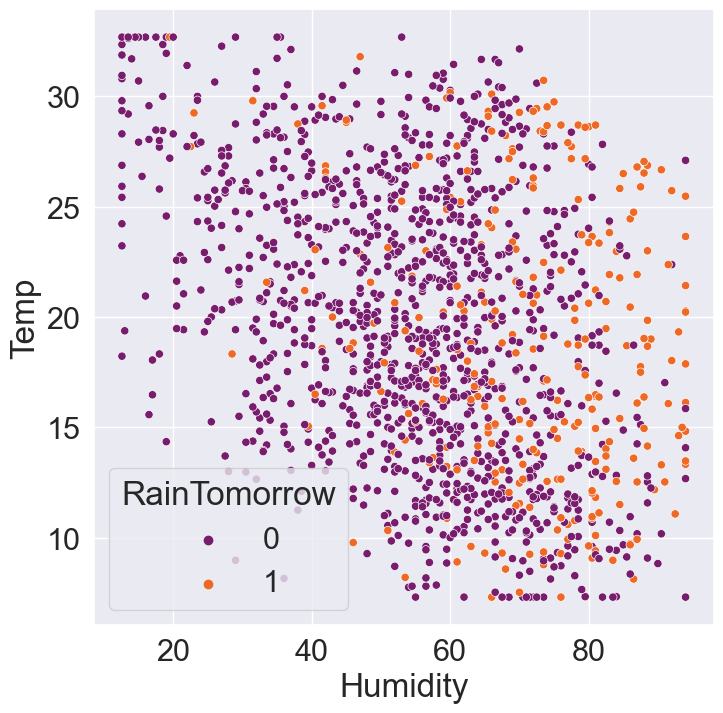

In [76]:
#checking the chances of rainfall for the next day
plt.figure(figsize = (8,8))
sns.set(font_scale = 2)
sns.scatterplot(x = 'Humidity', y = 'Temp', hue = 'RainTomorrow', palette = 'inferno', data = df)

<AxesSubplot:xlabel='Pressure', ylabel='Temp'>

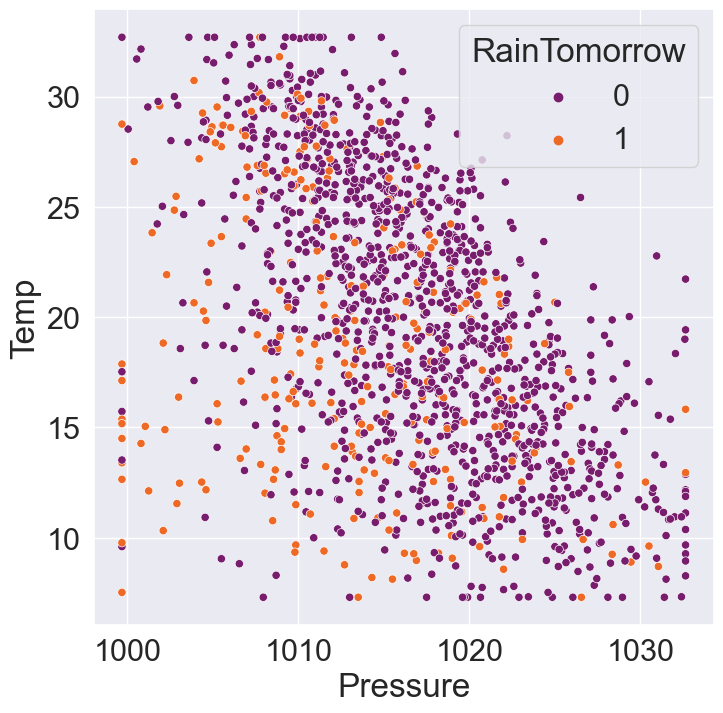

In [77]:
plt.figure(figsize = (8,8))
sns.set(font_scale = 2)
sns.scatterplot(x = 'Pressure', y = 'Temp', hue = 'RainTomorrow', palette = 'inferno', data = df)

We can see in the above graphs(scatter plots) that as the temperature increases with pressure and humidity for the present day, the chances of raining the next day decreses. So, we can conclude, according to statistical evidence that it will not rain the next day.